# <center>SOCCER DATA ANALYSIS FOR FORECASTING TEAM PERFORMANCE AND PLAYER PERFORMANCE</center>

### Interactive Soccer analysis to analyze player performance and team performance using Fbref la Liga match data from 2015 - 2021. In my analysis, We analysed the teams in every match based on avalaible features using Deep Learning (PyTorch). In our Result, we found that we were able to predict team win, loss, and draw using the neural networks. We used the 2015 to 2021 La Liga season data as our training data and the 2022/23 la Liga season data as our test data.

## The Features available in our Match Dataset are:
1. Date – Date of when match was played
2. Team – Name of La Liga Team
3. Venue – Whether it was a Home match or Away match
4. Result – Result of Match played
5. GF – Goals Scored by a Team
6. GA – Goals conceded by a Team
7. Opponent – Name of La Liga which they played against
8. xG – Expected Goals of a Team
9. xGA – Expected Assists of a Team
10. Poss – Possession gained by a Team
11. Formation – The playing formation of a team in a match
12. ShotCreatingAction – Total Shot Creating Action in a match
13. PassLive(Leading to Shot Attempt) – Number of live Passes that lead to Shot attempt
14. PassDead(Leading to Shot Attempt) - Number of dead Passes that lead to Shot attempt
15. DribblesLeadingtoShot – Dribbles that lead to a Shot in a match by Team
16. goalCreatingAction – Passage of play which leads to Goal Creation by Team
17. PassLive(Leading to Goals) – Number of live Passes that lead to goals
18. PassDead(Leading to Goals) - Number of dead Passes that lead to goals
19. Dribbles(Leading to Goals) - Dribbles that lead to goals in a match by Team
20. Total_Shots – Number of shots taken by a Team
21. Shots_on_Target – Shots on Target by a Team
22. Shots_on_Target% - Shots on Target % by a Team
23. Goals/Shot – Goals scored for every shot by a team
24. Goal/shot_on_target – Goals scored per shots on target by a team
25. Distance_from_goals_scored – Distance from Goal was scored by a team
26. Freekick – Freekick awarded to a team.
27. Penalty_kick – Penalty awarded to a team

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Read the Data: Train and Test Dataset

In [2]:
matchData = pd.read_excel('matchData.xlsx')
matchTestData = pd.read_excel('matchTestData.xlsx')

# Exploratory Data Analysis and Pre-processing
## (i) Train Dataset

In [3]:
matchData.head()

,Date,Team,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,...,dribblesLeadingToGoals,Total_Shots,Shots_on_target,Shots_on_target%,Goals/Shot,Goals/ShotsonTarget,Distance_from_goal_scored,Freekick,Penalty_kick,Season
0,2015-08-22,Atletico Madrid,Home,W,1,0,Las Palmas,0.6,0.6,62,...,0.0,14,3,21.4,0.07,0.33,19.6,2.0,0,2015-2016
1,2015-08-30,Atletico Madrid,Away,W,3,0,Sevilla,1.3,1.6,38,...,0.0,17,7,41.2,0.18,0.43,22.8,1.0,0,2015-2016
2,2015-09-12,Atletico Madrid,Home,L,1,2,Barcelona,0.9,2.1,31,...,0.0,11,3,27.3,0.09,0.33,18.5,0.0,0,2015-2016
3,2015-09-19,Atletico Madrid,Away,W,2,0,Eibar,1.3,0.3,59,...,0.0,14,6,42.9,0.14,0.33,16.7,0.0,0,2015-2016
4,2015-09-22,Atletico Madrid,Home,W,2,0,Getafe,1.2,0.5,54,...,0.0,12,3,25.0,0.17,0.67,19.1,0.0,0,2015-2016


## (ii) Test Dataset

In [4]:
matchTestData.head()

,Date,Team,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,...,dribblesLeadingToShot,goalCreatingAction,PassLive(LeadingtoGoal),PassDead(LeadingtoGoal),dribblesLeadingToGoals,Total_Shots,Shots_on_target,Shots_on_target%,Goals/Shot,Goals/ShotsonTarget
0,2022-08-14,Almeria,Home,L,1,2,Real Madrid,0.7,2.1,33,...,0,2,2,0,0,10,6,60.0,0.10,0.17
1,2022-08-22,Almeria,Away,D,1,1,Elche,0.7,1.0,46,...,3,0,0,0,0,12,7,58.3,0.08,0.14
2,2022-08-27,Almeria,Home,W,2,1,Sevilla,2.3,1.0,33,...,1,1,1,0,0,11,5,45.5,0.18,0.40
3,2022-09-05,Almeria,Away,L,0,1,Valladolid,0.5,1.2,49,...,0,0,0,0,0,12,0,0.0,0.00,NaN
4,2022-09-12,Almeria,Home,L,0,1,Osasuna,0.2,2.0,61,...,1,0,0,0,0,7,2,28.6,0.00,0.00


# Handling Missing Values

In [5]:
matchData.isnull().sum()

Date                                0
Team                                0
Venue                               0
Result                              0
GF                                  0
GA                                  0
Opponent                            0
xG                                768
xGA                               768
Poss                                0
YellowCard                          0
RedCard                             0
Formation                           0
shotCreatingAction                768
PassLive(LeadingtoShotAttempt)    768
PassDead(LeadingtoShotAttempt)    768
dribblesLeadingToShot             768
goalCreatingAction                768
PassLive(LeadingtoGoal)           768
PassDead(LeadingtoGoal)           768
dribblesLeadingToGoals            768
Total_Shots                         0
Shots_on_target                     0
Shots_on_target%                    3
Goals/Shot                          3
Goals/ShotsonTarget               161
Distance_fro

In [6]:
matchTestData.isnull().sum()

Date                              0
Team                              0
Venue                             0
Result                            0
GF                                0
GA                                0
Opponent                          0
xG                                0
xGA                               0
Poss                              0
shotCreatingAction                0
PassLive(LeadingtoShotAttempt)    0
PassDead(LeadingtoShotAttempt)    0
dribblesLeadingToShot             0
goalCreatingAction                0
PassLive(LeadingtoGoal)           0
PassDead(LeadingtoGoal)           0
dribblesLeadingToGoals            0
Total_Shots                       0
Shots_on_target                   0
Shots_on_target%                  0
Goals/Shot                        0
Goals/ShotsonTarget               9
dtype: int64

In [7]:
matchData['xG'] = matchData['xG'].fillna(matchData.groupby('Team')['xG'].transform('mean'))
matchData['xGA'] = matchData['xGA'].fillna(matchData.groupby('Team')['xGA'].transform('mean'))
matchData['shotCreatingAction'] = matchData['shotCreatingAction'].fillna(matchData.groupby('Team')['shotCreatingAction'].transform('mean'))
matchData['PassLive(LeadingtoShotAttempt)'] = matchData['PassLive(LeadingtoShotAttempt)'].fillna(matchData.groupby('Team')['PassLive(LeadingtoShotAttempt)'].transform('mean'))
matchData['PassDead(LeadingtoShotAttempt)'] = matchData['PassDead(LeadingtoShotAttempt)'].fillna(matchData.groupby('Team')['PassDead(LeadingtoShotAttempt)'].transform('mean'))
matchData['dribblesLeadingToShot'] = matchData['dribblesLeadingToShot'].fillna(matchData.groupby('Team')['dribblesLeadingToShot'].transform('mean'))
matchData['goalCreatingAction'] = matchData['goalCreatingAction'].fillna(matchData.groupby('Team')['goalCreatingAction'].transform('mean'))
matchData['PassLive(LeadingtoGoal)'] = matchData['PassLive(LeadingtoGoal)'].fillna(matchData.groupby('Team')['PassLive(LeadingtoGoal)'].transform('mean'))
matchData['PassDead(LeadingtoGoal)'] = matchData['PassDead(LeadingtoGoal)'].fillna(matchData.groupby('Team')['PassDead(LeadingtoGoal)'].transform('mean'))
matchData['dribblesLeadingToGoals'] = matchData['dribblesLeadingToGoals'].fillna(matchData.groupby('Team')['dribblesLeadingToGoals'].transform('mean'))
matchData['Shots_on_target%'] = matchData['Shots_on_target%'].fillna(matchData.groupby('Team')['Shots_on_target%'].transform('mean'))
matchData['Goals/Shot'] = matchData['Goals/Shot'].fillna(matchData.groupby('Team')['Goals/Shot'].transform('mean'))
matchData['Goals/ShotsonTarget'] = matchData['Goals/ShotsonTarget'].fillna(matchData.groupby('Team')['Goals/ShotsonTarget'].transform('mean'))
matchData['Distance_from_goal_scored'] = matchData['Distance_from_goal_scored'].fillna(matchData.groupby('Team')['Distance_from_goal_scored'].transform('mean'))
matchData['Freekick'] = matchData['Freekick'].fillna(matchData.groupby('Team')['Freekick'].transform('mean'))
matchTestData['Goals/ShotsonTarget'] = matchTestData['Goals/ShotsonTarget'].fillna(matchTestData.groupby('Team')['Goals/ShotsonTarget'].transform('mean'))

# Feature Extraction

### For our match prediction model, we want to use these features:'GF', 'GA', 'xG', 'xGA', 'Poss', 'shotCreatingAction', 'PassLive(LeadingtoShotAttempt)', 'PassDead(LeadingtoShotAttempt)', 'dribblesLeadingToShot', 'goalCreatingAction', 'PassLive(LeadingtoGoal)', 'PassDead(LeadingtoGoal)', 'dribblesLeadingToGoals', 'Total_Shots', 'Shots_on_target', 'Shots_on_target%', 'Goals/Shot', 'Goals/ShotsonTarget', 'Result_cat'


In [8]:
extract = [3,4,5,7,8,9,13,14,15,16,17,18,19,20,21,22,23,24,25]
trainData = matchData.iloc[:, extract]

In [9]:
extract = [3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
testData = matchTestData.iloc[:, extract]

## Class Distribution in Train Dataset and Test Dataset

<AxesSubplot:xlabel='Result', ylabel='count'>

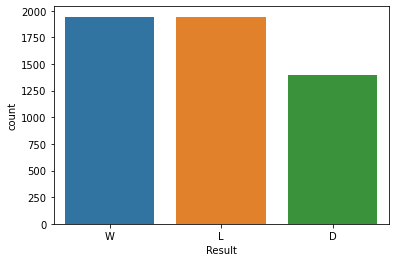

In [10]:
sns.countplot(x='Result', data=trainData)

<AxesSubplot:xlabel='Result', ylabel='count'>

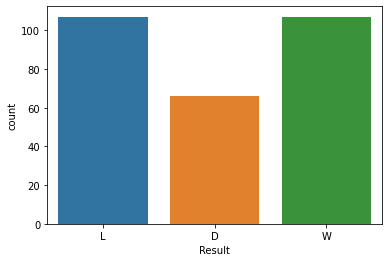

In [11]:
sns.countplot(x='Result', data=testData)

In [12]:
trainData = trainData.drop("Result", axis=1)
testData = testData.drop("Result", axis=1)

## Normalize Input

### Neural networks need data that lies between the range of (0,1).

### Normalization can help training of our neural networks as the different features are on a similar scale, which helps to stabilize the gradient descent step, allowing us to use larger learning rates or help models converge faster for a given learning rate.{source: Google}

In [13]:
trainData = trainData.apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()).round(2))
testData = testData.apply(lambda x: ((x - x.mean())/x.std()).round(2))

In [14]:
trainData.head()

,GF,GA,xG,xGA,Poss,shotCreatingAction,PassLive(LeadingtoShotAttempt),PassDead(LeadingtoShotAttempt),dribblesLeadingToShot,goalCreatingAction,PassLive(LeadingtoGoal),PassDead(LeadingtoGoal),dribblesLeadingToGoals,Total_Shots,Shots_on_target,Shots_on_target%,Goals/Shot,Goals/ShotsonTarget
0,-0.26,-1.07,-0.91,-0.92,1.08,-0.02,0.35,-1.29,-0.09,-0.03,-0.26,-0.40,-0.38,0.51,-0.42,-0.81,-0.32,0.15
1,1.37,-1.07,0.08,0.50,-1.08,1.06,1.18,-0.54,-0.09,1.49,0.98,2.54,-0.38,1.14,1.29,0.38,0.68,0.52
2,-0.26,0.55,-0.49,1.21,-1.71,-0.28,0.02,-1.29,-0.09,-0.03,0.36,-0.40,-0.38,-0.13,-0.42,-0.46,-0.14,0.15
3,0.56,-1.07,0.08,-1.35,0.81,0.66,0.52,0.20,-0.09,0.98,1.60,-0.40,-0.38,0.51,0.86,0.48,0.31,0.15
4,0.56,-1.07,-0.06,-1.07,0.36,-0.15,0.02,0.20,-0.09,0.47,0.36,-0.40,-0.38,0.08,-0.42,-0.59,0.59,1.42


In [15]:
testData.head()

,GF,GA,xG,xGA,Poss,shotCreatingAction,PassLive(LeadingtoShotAttempt),PassDead(LeadingtoShotAttempt),dribblesLeadingToShot,goalCreatingAction,PassLive(LeadingtoGoal),PassDead(LeadingtoGoal),dribblesLeadingToGoals,Total_Shots,Shots_on_target,Shots_on_target%,Goals/Shot,Goals/ShotsonTarget
0,-0.24,0.63,-0.68,1.11,-1.50,-0.47,-0.37,0.08,-0.80,-0.06,0.29,-0.39,-0.29,-0.42,0.86,1.65,0.03,-0.44
1,-0.24,-0.24,-0.68,-0.30,-0.35,-0.15,-0.63,0.08,1.63,-1.03,-0.89,-0.39,-0.29,-0.01,1.29,1.54,-0.18,-0.55
2,0.63,-0.24,1.36,-0.30,-1.50,-0.58,-0.63,-0.63,0.01,-0.54,-0.30,-0.39,-0.29,-0.22,0.43,0.74,0.88,0.45
3,-1.11,-0.24,-0.94,-0.04,-0.09,-0.15,-0.76,2.96,-0.80,-1.03,-0.89,-0.39,-0.29,-0.01,-1.72,-2.12,-1.02,-0.12
4,-1.11,-0.24,-1.32,0.98,0.97,-0.80,-0.63,-0.63,0.01,-1.03,-0.89,-0.39,-0.29,-1.04,-0.86,-0.32,-1.02,-1.09


## Encoding Output Class

In [16]:
labelencoder = LabelEncoder()
trainData['Result'] = matchData["Result"].values
testData['Result'] = matchTestData["Result"].values

In [17]:
trainData['Result_cat'] = labelencoder.fit_transform(trainData['Result'])
testData['Result_cat'] = labelencoder.fit_transform(testData['Result'])

In [18]:
trainData = trainData.drop("Result", axis=1)
testData = testData.drop("Result", axis=1)

## Create Input and Output Data

In [19]:
train_Data = trainData.iloc[:, 0:-1]         #input
trainDataResult = trainData.iloc[:,-1]       #output
test_Data = testData.iloc[:, 0:-1]           #input
testDataResult = testData.iloc[:, -1]        #output

#### We are creating this features_length column which we will be using later on while building PyTorch Model. We can do it later too.  

In [20]:
features_length = len(train_Data.columns)

In [21]:
train_Data.head()

,GF,GA,xG,xGA,Poss,shotCreatingAction,PassLive(LeadingtoShotAttempt),PassDead(LeadingtoShotAttempt),dribblesLeadingToShot,goalCreatingAction,PassLive(LeadingtoGoal),PassDead(LeadingtoGoal),dribblesLeadingToGoals,Total_Shots,Shots_on_target,Shots_on_target%,Goals/Shot,Goals/ShotsonTarget
0,-0.26,-1.07,-0.91,-0.92,1.08,-0.02,0.35,-1.29,-0.09,-0.03,-0.26,-0.40,-0.38,0.51,-0.42,-0.81,-0.32,0.15
1,1.37,-1.07,0.08,0.50,-1.08,1.06,1.18,-0.54,-0.09,1.49,0.98,2.54,-0.38,1.14,1.29,0.38,0.68,0.52
2,-0.26,0.55,-0.49,1.21,-1.71,-0.28,0.02,-1.29,-0.09,-0.03,0.36,-0.40,-0.38,-0.13,-0.42,-0.46,-0.14,0.15
3,0.56,-1.07,0.08,-1.35,0.81,0.66,0.52,0.20,-0.09,0.98,1.60,-0.40,-0.38,0.51,0.86,0.48,0.31,0.15
4,0.56,-1.07,-0.06,-1.07,0.36,-0.15,0.02,0.20,-0.09,0.47,0.36,-0.40,-0.38,0.08,-0.42,-0.59,0.59,1.42


In [22]:
trainDataResult.head()

0    2
1    2
2    1
3    2
4    2
Name: Result_cat, dtype: int32

In [23]:
test_Data.head()

,GF,GA,xG,xGA,Poss,shotCreatingAction,PassLive(LeadingtoShotAttempt),PassDead(LeadingtoShotAttempt),dribblesLeadingToShot,goalCreatingAction,PassLive(LeadingtoGoal),PassDead(LeadingtoGoal),dribblesLeadingToGoals,Total_Shots,Shots_on_target,Shots_on_target%,Goals/Shot,Goals/ShotsonTarget
0,-0.24,0.63,-0.68,1.11,-1.50,-0.47,-0.37,0.08,-0.80,-0.06,0.29,-0.39,-0.29,-0.42,0.86,1.65,0.03,-0.44
1,-0.24,-0.24,-0.68,-0.30,-0.35,-0.15,-0.63,0.08,1.63,-1.03,-0.89,-0.39,-0.29,-0.01,1.29,1.54,-0.18,-0.55
2,0.63,-0.24,1.36,-0.30,-1.50,-0.58,-0.63,-0.63,0.01,-0.54,-0.30,-0.39,-0.29,-0.22,0.43,0.74,0.88,0.45
3,-1.11,-0.24,-0.94,-0.04,-0.09,-0.15,-0.76,2.96,-0.80,-1.03,-0.89,-0.39,-0.29,-0.01,-1.72,-2.12,-1.02,-0.12
4,-1.11,-0.24,-1.32,0.98,0.97,-0.80,-0.63,-0.63,0.01,-1.03,-0.89,-0.39,-0.29,-1.04,-0.86,-0.32,-1.02,-1.09


In [24]:
testDataResult.head()

0    1
1    0
2    2
3    1
4    1
Name: Result_cat, dtype: int32

## Visualize Class Distribution in Train and Test

In [25]:
def get_class_distribution(obj):
    count_dict = {
        "W" : 0,
        "L" : 0,
        "D" : 0
    }

    for i in obj:
        if i == 0:
            count_dict['D'] +=1
        elif i == 1:
            count_dict['L'] += 1
        elif i == 2:
            count_dict['W'] += 1
        else:
            print("Check Classes")
    return count_dict

Text(0.5, 1.0, 'Class Distribution in Test Set')

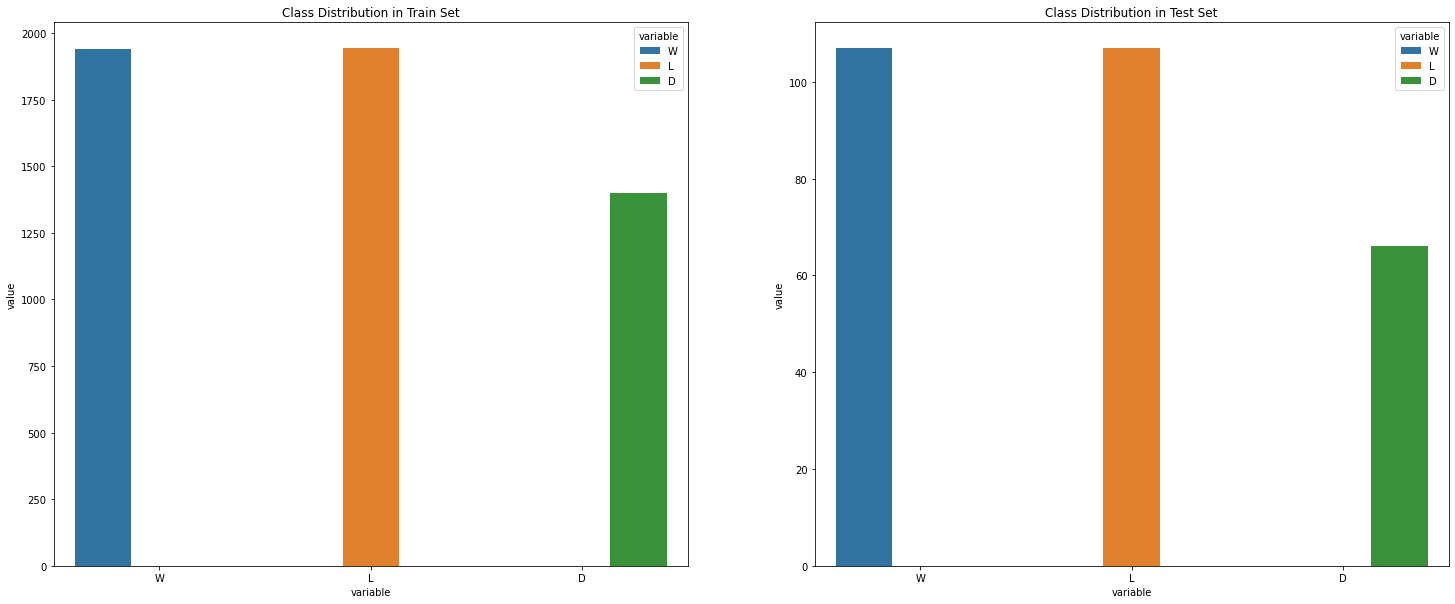

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10))

#Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(trainDataResult)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')

# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(testDataResult)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Test Set')



# Neural Network

## Custom Dataset

In [27]:
class ClassifierDataset(Dataset):

    def __init__(self,X_data,y_data):
        self.X_data = X_data
        self.y_data = y_data
    
    def __getitem__(self, index):
        return self.X_data[index],self.y_data[index]

    def __len__(self):
        return len(self.X_data)

In [28]:
train_Data , trainDataResult = np.array(train_Data) , np.array(trainDataResult)

test_Data , testDataResult = np.array(test_Data) , np.array(testDataResult)

In [29]:
trainDataset = ClassifierDataset(torch.from_numpy(train_Data).float(), torch.from_numpy(trainDataResult).long())

testDataset = ClassifierDataset(torch.from_numpy(test_Data).float(), torch.from_numpy(testDataResult).long())

# Model Parameters

In [30]:
EPOCHS = 300
BATCH_SIZE = 32
LEARNING_RATE = 0.001
NUM_FEATURES = features_length
NUM_CLASSES = 3

# Data Loader

In [31]:
train_loader = DataLoader(dataset=trainDataset,batch_size=BATCH_SIZE)

test_loader = DataLoader(dataset=testDataset,batch_size=16)

# Class Count and Class Weights

In [32]:
class_count = [ i for i in get_class_distribution(trainDataResult).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float)
print(class_weights)

tensor([0.0005, 0.0005, 0.0007])


# Define Neural Net Architecture

In [33]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()

        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)

    def forward(self,x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)

        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer_out(x)

        return x

In [34]:
model = MulticlassClassification(num_feature=NUM_FEATURES, num_class=NUM_CLASSES)

criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters() , lr=LEARNING_RATE)

print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=18, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


# Train the Model

In [35]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)

    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)

    acc = torch.round(acc * 100)
    return acc


In [36]:
accuracy_stats = {
    'train' : []
}

loss_stats = {
    'train':[]
}


In [37]:
print("Begin Training")
for e in (range(1,EPOCHS+1)):
    #TRAINING
    train_epoch_loss = 0
    train_epoch_accuracy = 0

    model.train()
    for x_train, y_train in  train_loader:
        x_train = x_train
        y_train = y_train

        optimizer.zero_grad()

        y_train_pred = model(x_train)
        train_loss = criterion(y_train_pred,y_train)
        train_acc = multi_acc(y_train_pred, y_train)

        train_loss.backward()
        optimizer.step()

        train_epoch_loss += train_loss.item()
        train_epoch_accuracy += train_acc.item()

    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    accuracy_stats['train'].append(train_epoch_accuracy/len(train_loader))

    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Train Accuracy: {train_epoch_accuracy/len(train_loader):.3f}')


Begin Training
Epoch 001: | Train Loss: 0.49362 | Train Accuracy: 76.777
Epoch 002: | Train Loss: 0.38193 | Train Accuracy: 82.367
Epoch 003: | Train Loss: 0.34033 | Train Accuracy: 85.012
Epoch 004: | Train Loss: 0.30938 | Train Accuracy: 86.404
Epoch 005: | Train Loss: 0.27901 | Train Accuracy: 88.193
Epoch 006: | Train Loss: 0.25108 | Train Accuracy: 89.199
Epoch 007: | Train Loss: 0.23822 | Train Accuracy: 89.964
Epoch 008: | Train Loss: 0.21339 | Train Accuracy: 90.855
Epoch 009: | Train Loss: 0.19263 | Train Accuracy: 91.988
Epoch 010: | Train Loss: 0.17898 | Train Accuracy: 93.096
Epoch 011: | Train Loss: 0.16469 | Train Accuracy: 93.211
Epoch 012: | Train Loss: 0.15418 | Train Accuracy: 93.849
Epoch 013: | Train Loss: 0.13550 | Train Accuracy: 94.867
Epoch 014: | Train Loss: 0.12725 | Train Accuracy: 95.145
Epoch 015: | Train Loss: 0.11164 | Train Accuracy: 95.777
Epoch 016: | Train Loss: 0.10361 | Train Accuracy: 96.066
Epoch 017: | Train Loss: 0.10659 | Train Accuracy: 95.675

Epoch 142: | Train Loss: 0.01219 | Train Accuracy: 99.675
Epoch 143: | Train Loss: 0.00711 | Train Accuracy: 99.729
Epoch 144: | Train Loss: 0.00844 | Train Accuracy: 99.693
Epoch 145: | Train Loss: 0.00258 | Train Accuracy: 99.928
Epoch 146: | Train Loss: 0.00192 | Train Accuracy: 99.964
Epoch 147: | Train Loss: 0.00334 | Train Accuracy: 99.928
Epoch 148: | Train Loss: 0.01465 | Train Accuracy: 99.651
Epoch 149: | Train Loss: 0.00491 | Train Accuracy: 99.855
Epoch 150: | Train Loss: 0.00981 | Train Accuracy: 99.602
Epoch 151: | Train Loss: 0.01045 | Train Accuracy: 99.639
Epoch 152: | Train Loss: 0.00463 | Train Accuracy: 99.892
Epoch 153: | Train Loss: 0.00477 | Train Accuracy: 99.801
Epoch 154: | Train Loss: 0.00877 | Train Accuracy: 99.729
Epoch 155: | Train Loss: 0.00402 | Train Accuracy: 99.873
Epoch 156: | Train Loss: 0.00173 | Train Accuracy: 99.964
Epoch 157: | Train Loss: 0.00266 | Train Accuracy: 99.928
Epoch 158: | Train Loss: 0.00304 | Train Accuracy: 99.873
Epoch 159: | T

Epoch 284: | Train Loss: 0.00096 | Train Accuracy: 99.982
Epoch 285: | Train Loss: 0.00030 | Train Accuracy: 100.000
Epoch 286: | Train Loss: 0.00026 | Train Accuracy: 100.000
Epoch 287: | Train Loss: 0.00023 | Train Accuracy: 100.000
Epoch 288: | Train Loss: 0.00034 | Train Accuracy: 99.982
Epoch 289: | Train Loss: 0.00188 | Train Accuracy: 99.946
Epoch 290: | Train Loss: 0.00040 | Train Accuracy: 100.000
Epoch 291: | Train Loss: 0.00331 | Train Accuracy: 99.910
Epoch 292: | Train Loss: 0.00765 | Train Accuracy: 99.765
Epoch 293: | Train Loss: 0.00396 | Train Accuracy: 99.946
Epoch 294: | Train Loss: 0.00152 | Train Accuracy: 99.946
Epoch 295: | Train Loss: 0.00405 | Train Accuracy: 99.819
Epoch 296: | Train Loss: 0.00984 | Train Accuracy: 99.765
Epoch 297: | Train Loss: 0.00296 | Train Accuracy: 99.928
Epoch 298: | Train Loss: 0.00190 | Train Accuracy: 99.928
Epoch 299: | Train Loss: 0.00056 | Train Accuracy: 99.982
Epoch 300: | Train Loss: 0.00344 | Train Accuracy: 99.910


In [38]:
train_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

In [39]:
train_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

# Visualize Loss aand Accuracy

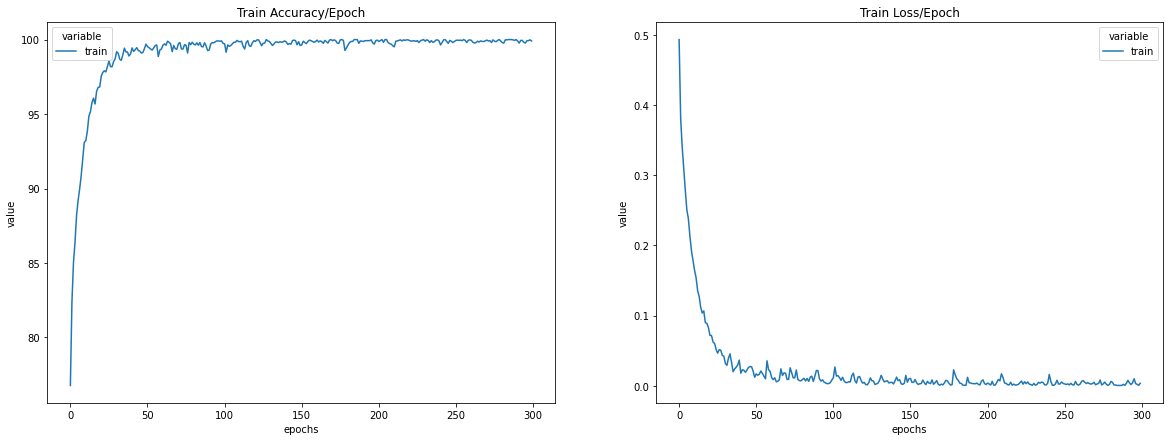

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

sns.lineplot(data=train_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train Accuracy/Epoch')

sns.lineplot(data=train_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train Loss/Epoch')

plt.show()

# Test the model

In [41]:
y_pred_list = []

with torch.no_grad():
    model.eval()
    for x_train_batch ,_ in test_loader:
        y_test_pred = model(x_train_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim=1)
        y_pred_list.append(y_pred_tags.numpy())
        
y_pred_list = [x.squeeze().tolist() for x in y_pred_list]

In [42]:
y_pred_list_new = []
for i in y_pred_list:
    for x in i:
        y_pred_list_new.append(x)

# Confusion Matrix

<AxesSubplot:>

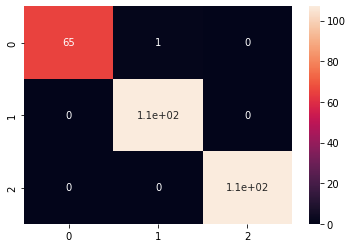

In [43]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(testDataResult, y_pred_list_new))
sns.heatmap(confusion_matrix_df
            , annot=True)

# Classification Report

In [44]:
print(classification_report(testDataResult, y_pred_list_new))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.99      1.00      1.00       107
           2       1.00      1.00      1.00       107

    accuracy                           1.00       280
   macro avg       1.00      0.99      1.00       280
weighted avg       1.00      1.00      1.00       280

